### Reference
http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html

https://www.math.pku.edu.cn/teachers/lidf/docs/Rbook/html/_Rbook/ggplot2.html

R Graphics Cookbook, 2nd edition
https://r-graphics.org/index.html

https://www.jianshu.com/p/03719d7c207f

https://www.bilibili.com/video/BV19W411j712?from=search&seid=7125679471422141637

In [2]:
library(tidyverse)
library(ggplot2)
library(gapminder)
library(socviz)
library(ggsci)
library("gridExtra")
library(stringr)
library(scales)
library("ggrepel")

### Figure 1B v2
Wrap up xtick label: https://stackoverflow.com/questions/21878974/auto-wrapping-of-labels-via-labeller-label-wrap-in-ggplot2

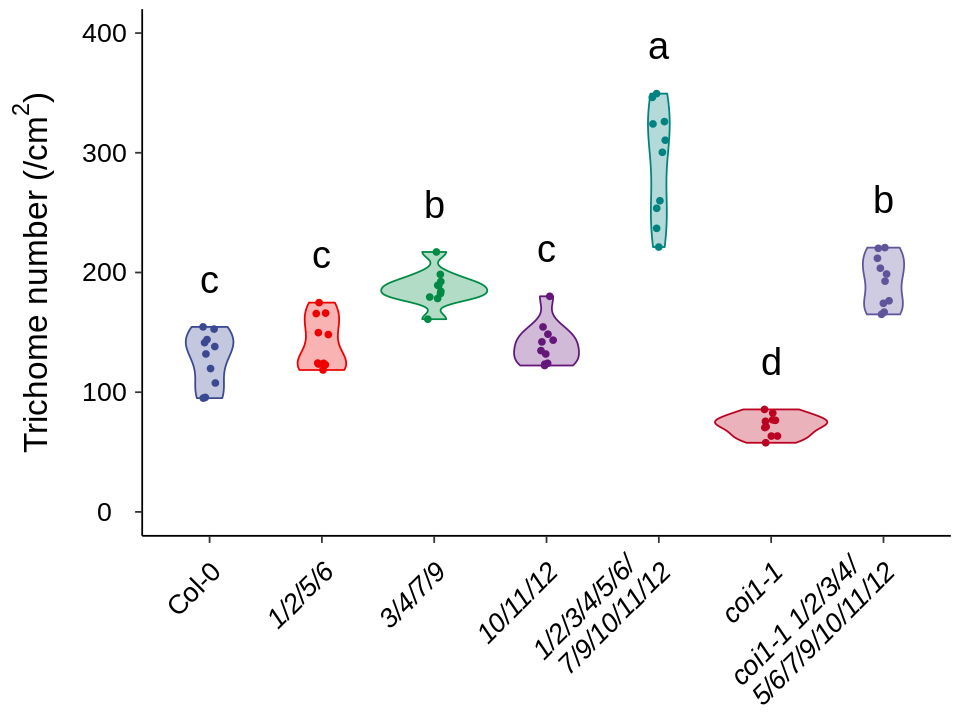

In [15]:
df <- read.table("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/02.V2_data/1b.tab",
                header=TRUE,
                stringsAsFactors=FALSE)

# set df for sig note
df$max <- apply(df[,c(2:9)],1,max) + 40
df_long <- gather(df, replicate, value, R1:R10)
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "jaz1/2/5/6",
                                                      "jaz3/4/7/9",
                                                      "jaz10/11/12",
                                                      "jaz1/2/3/4/5/6/7/9/10/11/12",
                                                      "coi1-1",
                                                      "coi1-1 jaz1/2/3/4/5/6/7/9/10/11/12"))


# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
#               axis.ticks.x = element_blank(),
              axis.text.x = element_text(size=16, angle=45, color="black", 
                                         vjust=1,hjust=1,
                                         margin = margin(t = 10, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0))
             )
}

# set figure size
options(repr.plot.width = 8, repr.plot.height = 6)

# generate x-tick label vector
xtick_labs <- c("Col-0",
               expression(italic("1/2/5/6")),
               expression(italic("3/4/7/9")),
               expression(italic("10/11/12")),
               expression(italic("1/2/3/4/5/6/ \n 7/9/10/11/12")),
               expression(italic("coi1-1")),
#                expression(italic("     coi1-1 \n 1/2/3/4/5/6/ \n 7/9/10/11/12"))
               expression(italic("coi1-1 1/2/3/4/\n5/6/7/9/10/11/12"))
               )

p <- ggplot(df_long, aes(genotype,value, fill=genotype,color=genotype))

B1 <- p + geom_violin(alpha=0.3, width=1, show.legend=FALSE) + 
    geom_jitter(size=1.5, width=0.06, height=0, show.legend=FALSE) + 
    theme_custom() + 
    scale_fill_aaas() +
    scale_color_aaas() +
    scale_x_discrete(labels=xtick_labs) +
    ylim(0,400) + 
    ylab(quote("Trichome number (/cm" ^ "2" *")")) +
    geom_text(data=df,aes(x=genotype,y=max,label=sig),size=8,color="black",show.legend=FALSE)

B1


### Figure 1C v2

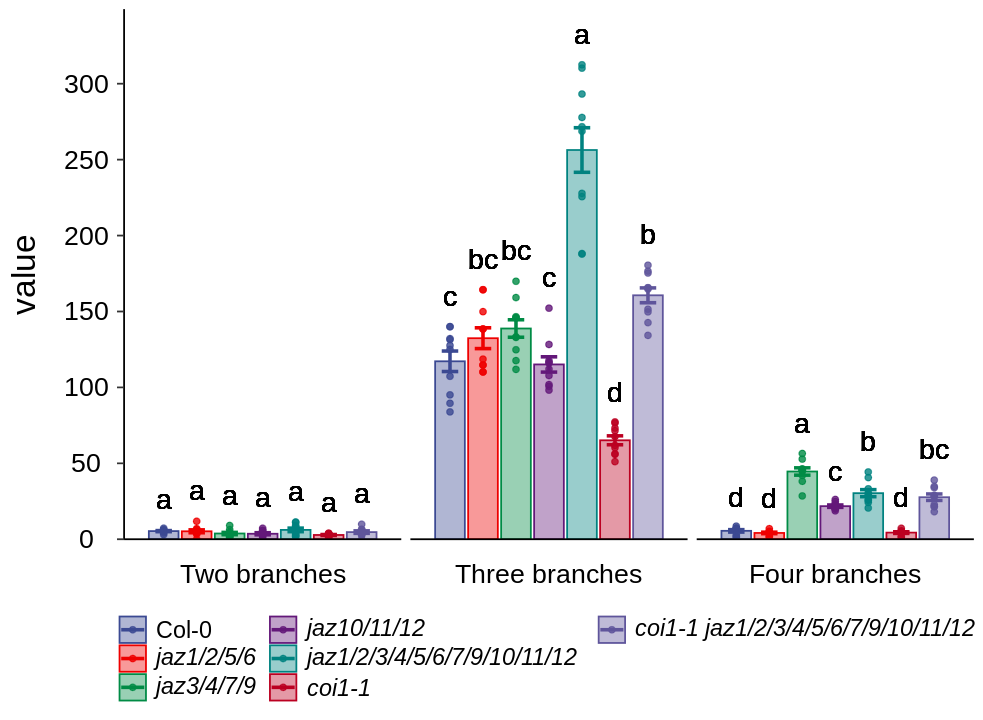

In [49]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/02.V2_data/1c.tab",
                header=TRUE,
                sep="\t",
                stringsAsFactors=FALSE,
                quote="")
df$max <- apply(df[,c(4:9)],1,max) + 20
df_long <- gather(df, replicate, value, R1:R10)

# set genotype order
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "jaz1/2/5/6",
                                                      "jaz3/4/7/9",
                                                      "jaz10/11/12",
                                                      "jaz1/2/3/4/5/6/7/9/10/11/12",
                                                      "coi1-1",
                                                      "coi1-1 jaz1/2/3/4/5/6/7/9/10/11/12"))
df_long$tri_type <- factor(df_long$tri_type, levels=c("Two branches",
                                                      "Three branches",
                                                      "Four branches"))
# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(0.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
              axis.ticks.x = element_blank(),
              axis.text.x = element_text(size=16, angle=0, color="black", margin = margin(t = 10, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_blank(),
              legend.title = element_blank(),
#               legend.position = c(0.82,0.7),
              legend.position = "bottom",
              legend.justification = "center",
              legend.text = element_text(size = 14),
              legend.text.align = 0
             )
}




# set figure size
options(repr.plot.width = 8.2, repr.plot.height = 6)

p <- ggplot(df_long, aes(tri_type,value, fill=genotype, color=genotype))

C1 <- p + stat_summary(fun="mean", 
                 geom="col", 
                 position = position_dodge(1),
                 alpha=0.4) + 
    stat_summary(fun.data = mean_se, 
                 geom = "errorbar", 
                 position = position_dodge(width=1),
                 width = 0.5,                 
#                  position=position_dodge2(width=0.5,padding=0.5),
                 size=1) +
    geom_jitter(alpha=0.8, 
                position = position_dodge(1)
#                 position = position_jitterdodge(jitter.width=0.1, dodge.width=0.9)
               ) +
    theme_custom() +
    scale_fill_aaas(labels=expression("Col-0",
                                      italic("jaz1/2/5/6"),
                                      italic("jaz3/4/7/9"),
                                      italic("jaz10/11/12"),
                                      italic("jaz1/2/3/4/5/6/7/9/10/11/12"),
                                      italic("coi1-1"),
                                      italic("coi1-1 jaz1/2/3/4/5/6/7/9/10/11/12")),
                    guide=guide_legend(nrow=3)) +
    scale_color_aaas(labels=expression("Col-0",
                                      italic("jaz1/2/5/6"),
                                      italic("jaz3/4/7/9"),
                                      italic("jaz10/11/12"),
                                      italic("jaz1/2/3/4/5/6/7/9/10/11/12"),
                                      italic("coi1-1"),
                                      italic("coi1-1 jaz1/2/3/4/5/6/7/9/10/11/12"))) + 
    facet_grid(~ tri_type, scales="free_x", space="free_x") +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05)),
                       breaks=seq(0, 350, 50)) +
    geom_text(aes(label= sig, y= max),
              size=6,
              color="black",
              position = position_dodge(1), 
              check_overlap=FALSE, 
              show.legend=FALSE)
C1

### Figure 1D v2

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


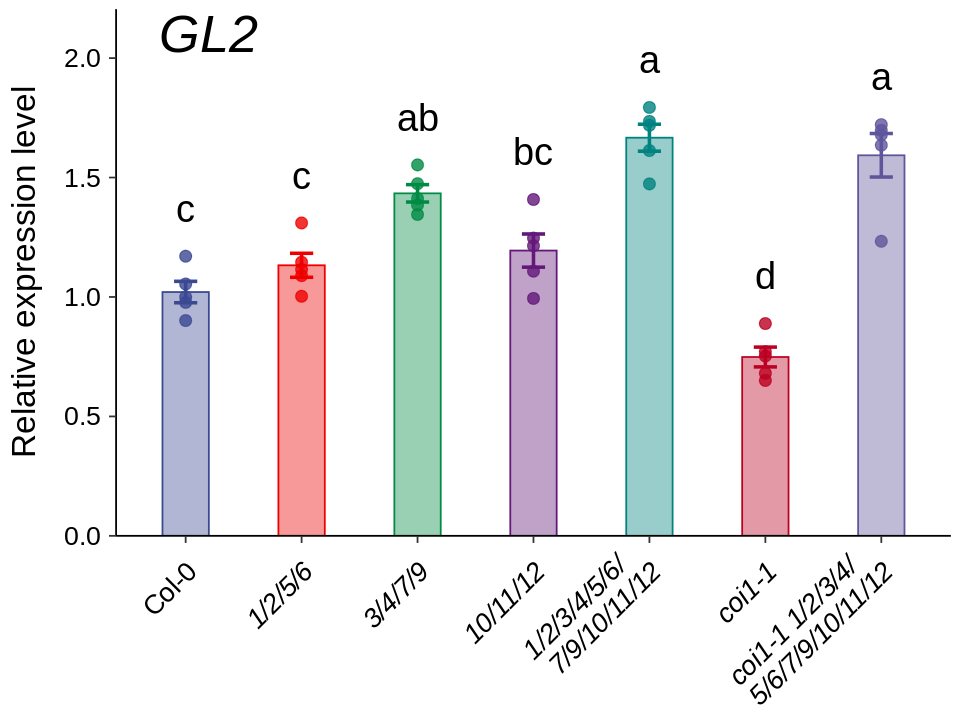

In [50]:
# data input and reshape
df <- read.table("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/02.V2_data/1d.tab",
                header=TRUE,
                 sep="\t",
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(2:6)],1,max) + 0.2

# transformat df
df_long <- gather(df, replicate, value, R1:R5)

# set genotype order
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "jaz1/2/5/6",
                                                      "jaz3/4/7/9",
                                                      "jaz10/11/12",
                                                      "jaz1/2/3/4/5/6/7/9/10/11/12",
                                                      "coi1-1",
                                                      "coi1-1 jaz1/2/3/4/5/6/7/9/10/11/12"))

# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
#               axis.ticks.x = element_blank(),
              axis.text.x = element_text(size=16, angle=45, color="black", 
                                         vjust=1, hjust=1,
                                         margin = margin(t = 10, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_blank(),
#               legend.title = element_blank(),
#               legend.position = c(0.82,0.7),
#               legend.position = "bottom",
#               legend.justification = "center",
#               legend.text = element_text(size = 18),
#               legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 8, repr.plot.height = 6)

# generate x-tick label vector
xtick_labs <- c("Col-0",
               expression(italic("1/2/5/6")),
               expression(italic("3/4/7/9")),
               expression(italic("10/11/12")),
               expression(italic("1/2/3/4/5/6/ \n 7/9/10/11/12")),
               expression(italic("coi1-1")),
#                expression(italic("      coi1-1 \n 1/2/3/4/5/6/ \n 7/9/10/11/12"))
               expression(italic("coi1-1 1/2/3/4/\n5/6/7/9/10/11/12"))
               )

p <- ggplot(df_long, aes(genotype, value, fill=genotype, color=genotype))
D1 <- p + stat_summary(fun="mean", 
                 geom="col", 
                 width=0.4,
                 alpha=0.4, 
                 show.legend=FALSE) + 
    stat_summary(fun.data = mean_se, 
                 geom = "errorbar", 
                 width = 0.2,                 
                 size=1,
                 show.legend=FALSE) +
    geom_point(alpha=0.8,
                size=3,
                show.legend=FALSE)  +
    theme_custom() +
    scale_fill_aaas() +
    scale_color_aaas() +
    scale_x_discrete(labels=xtick_labs) +
    ylab(quote("Relative expression level")) +
    geom_text(data=df,aes(x=genotype,y=max,label=sig),size=8,color="black",show.legend=FALSE) +
#     ylim(0, 2.2) +
    annotate(geom="text", x=1.2, y=2.1,size=11,
            label=expression(italic("GL2"))) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05)))
D1


### Figure 1E  v2

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


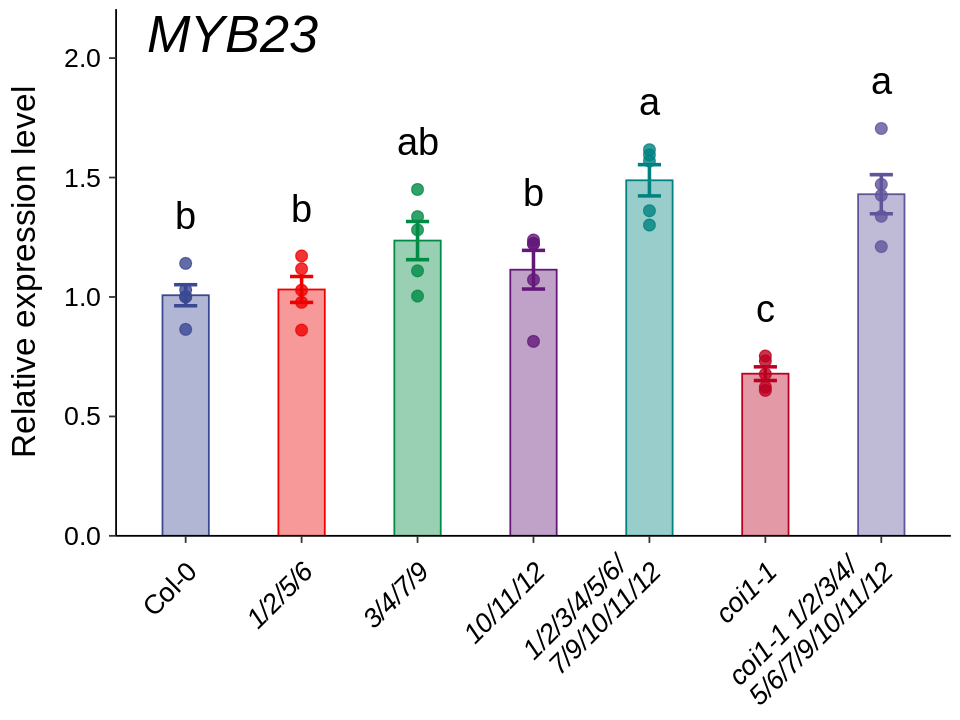

In [51]:
# data input and reshape
df <- read.table("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/02.V2_data/1e.tab",
                header=TRUE,
                 sep='\t',
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(2:6)],1,max) + 0.2

# transformat df
df_long <- gather(df, replicate, value, R1:R5)

# set genotype order
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "jaz1/2/5/6",
                                                      "jaz3/4/7/9",
                                                      "jaz10/11/12",
                                                      "jaz1/2/3/4/5/6/7/9/10/11/12",
                                                      "coi1-1",
                                                      "coi1-1 jaz1/2/3/4/5/6/7/9/10/11/12"))


# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
#               axis.ticks.x = element_blank(),
              axis.text.x = element_text(size=16, angle=45, color="black", 
                                         vjust=1,hjust=1,
                                         margin = margin(t = 10, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_blank(),
#               legend.title = element_blank(),
#               legend.position = c(0.82,0.7),
#               legend.position = "bottom",
#               legend.justification = "center",
#               legend.text = element_text(size = 18),
#               legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 8, repr.plot.height = 6)

# generate x-tick label vector
xtick_labs <- c("Col-0",
               expression(italic("1/2/5/6")),
               expression(italic("3/4/7/9")),
               expression(italic("10/11/12")),
               expression(italic("1/2/3/4/5/6/ \n 7/9/10/11/12")),
               expression(italic("coi1-1")),
#                expression(italic("      coi1-1 \n 1/2/3/4/5/6/ \n 7/9/10/11/12"))
                expression(italic("coi1-1 1/2/3/4/\n5/6/7/9/10/11/12"))
               )

p <- ggplot(df_long, aes(genotype, value, fill=genotype, color=genotype))
E1 <- p + stat_summary(fun="mean", 
                 geom="col", 
                 width=0.4,
                 alpha=0.4, 
                 show.legend=FALSE) + 
    stat_summary(fun.data = mean_se, 
                 geom = "errorbar", 
                 width = 0.2,                 
                 size=1,
                 show.legend=FALSE) +
    geom_point(alpha=0.8,
                size=3,
                show.legend=FALSE)  +
    theme_custom() +
    scale_fill_aaas() +
    scale_color_aaas() +
    scale_x_discrete(labels=xtick_labs) +
    ylab(quote("Relative expression level")) +
    geom_text(data=df,aes(x=genotype,y=max,label=sig),size=8,color="black",show.legend=FALSE) +
#     ylim(0, 2.2) +
    annotate(geom="text", x=1.4, y=2.1,size=11,
            label=expression(italic("MYB23"))) + 
    scale_y_continuous(expand = expansion(mult = c(0, 0.05)))

E1


### Figure 1F v2

### Figure 1G v2

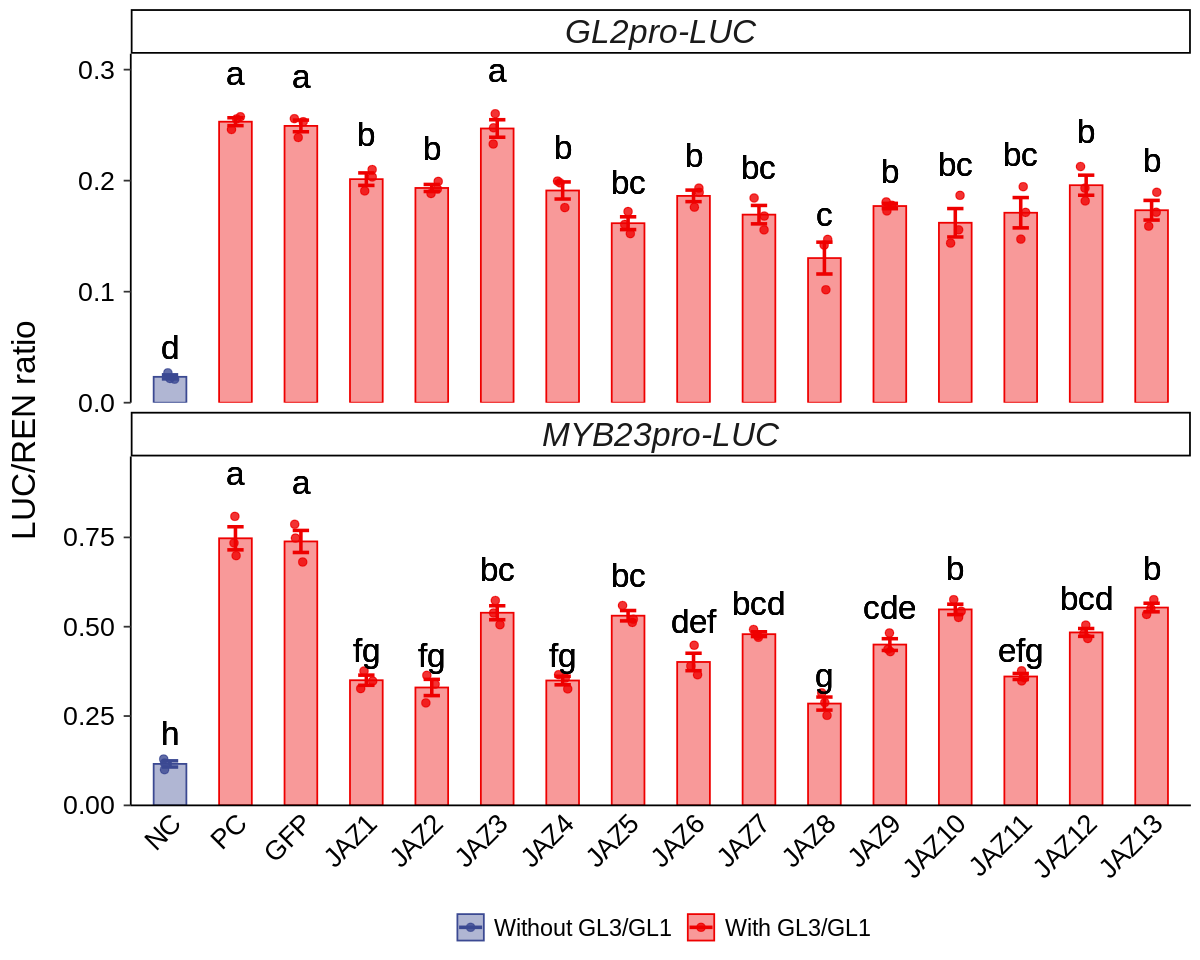

In [45]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/02.V2_data/1g.tab",
                header=TRUE,
               sep='\t',
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(6:8)],1,max) * 1.15
df$max[df$luc=="MYB23pro-LUC" & df$genotype=="NC"] = 0.20
df$max[df$luc=="GL2pro-LUC" & df$genotype=="NC"] = 0.05

# transformat df
df_long <- gather(df, replicate, value, R1:R3)
df_long$genotype <- factor(df_long$genotype, levels=c("NC","PC","GFP",
                                                      "JAZ1","JAZ2","JAZ3","JAZ4","JAZ5",
                                                      "JAZ6","JAZ7","JAZ8","JAZ9","JAZ10",
                                                      "JAZ11","JAZ12","JAZ13"))
df_long$treatment <- factor(df_long$treatment, levels=c("Without GL3/GL1",
                                                        "With GL3/GL1"))

# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
              axis.ticks.x = element_blank(),
#               axis.text.x = element_blank(),
              axis.text.x = element_text(size=16, angle=45, color="black", 
                                         vjust=1, hjust=1,
                                         margin = margin(t = 0, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_text(size=20, face="italic"),
              legend.title = element_blank(),
              legend.position = "bottom",
              legend.justification = "center",
              legend.text = element_text(size = 14),
              legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 10, repr.plot.height = 8)

p <- ggplot(df_long, aes(genotype, value, fill=treatment, color=treatment))

G1 <- p + stat_summary(fun="mean", 
                 geom="col", 
                 width=0.5,
                 position = position_dodge(1),
                 alpha=0.4) + 
    stat_summary(fun.data = mean_se, 
                 geom = "errorbar", 
                 position = position_dodge(width=1),
                 width = 0.25,                 
                 size=1) +
    geom_jitter(alpha=0.8, 
                size=2,
                width=0.1) +
    theme_custom() +
    ylab(quote("LUC/REN ratio")) +
    scale_fill_aaas() +
    scale_color_aaas() + 
    facet_wrap(~ luc, 
               nrow=2, 
               scales="free_y") +
    geom_text(aes(label= sig, y= max),
              size=7,
              color="black",
              position = position_dodge(1), 
              check_overlap = FALSE, 
              show.legend=FALSE) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05)))
G1

## Cowplot Figure 1

In [47]:
library(cowplot)

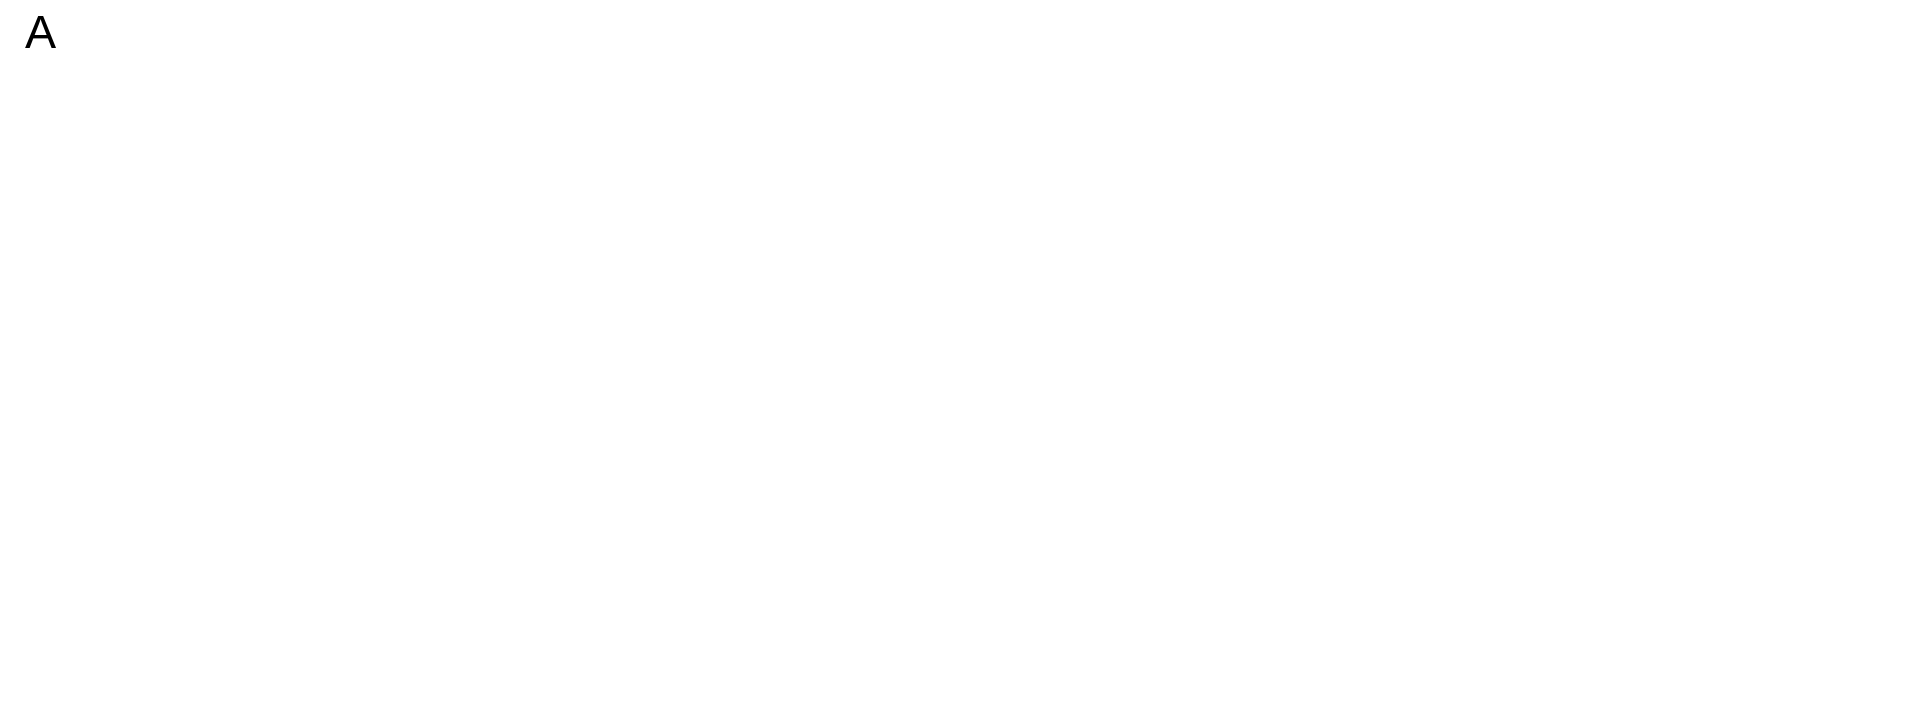

In [58]:
options(repr.plot.width = 16, repr.plot.height = 6)
fig1_p0 <- plot_grid(NULL,
                      ncol=2,
                      labels = c('A'),
                      label_colour = 'black',
                      label_x = 0.01,
                      label_y = 1,
                      label_fontface = 1,
                      label_size = 28,
                      scale=0.9)
fig1_p0

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


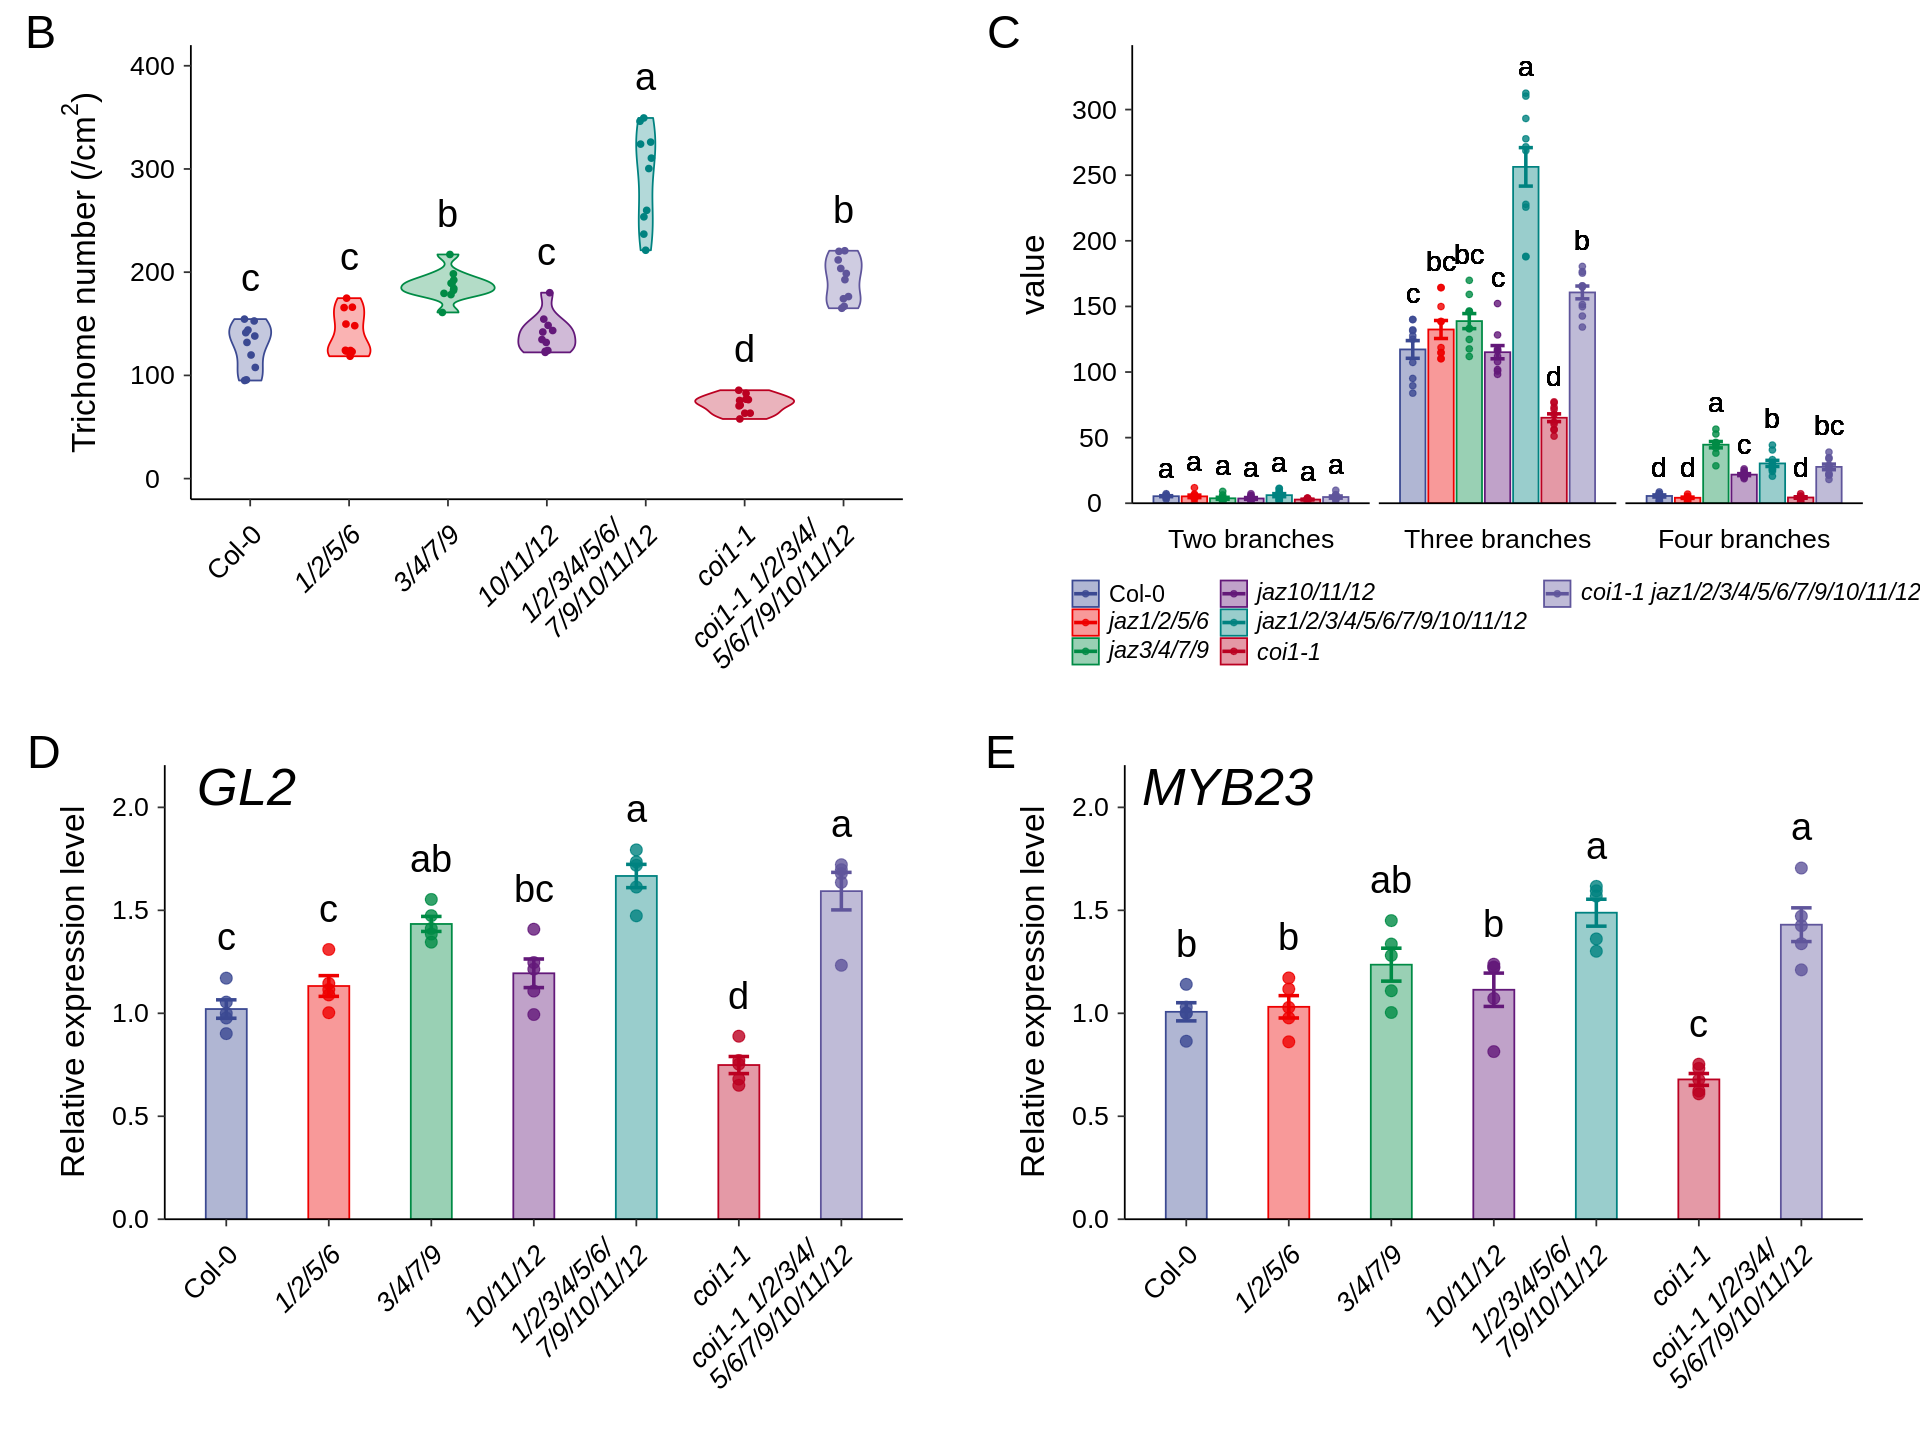

In [59]:
options(repr.plot.width = 16, repr.plot.height = 12)
fig1_p1 <- plot_grid(B1,C1,D1,E1,
                      ncol=2,
                      labels = c('B','C','D','E'),
                      label_colour = 'black',
                      label_x = 0.01,
                      label_y = 1,
                      label_fontface = 1,
                      label_size = 28,
                      scale=0.9)
fig1_p1

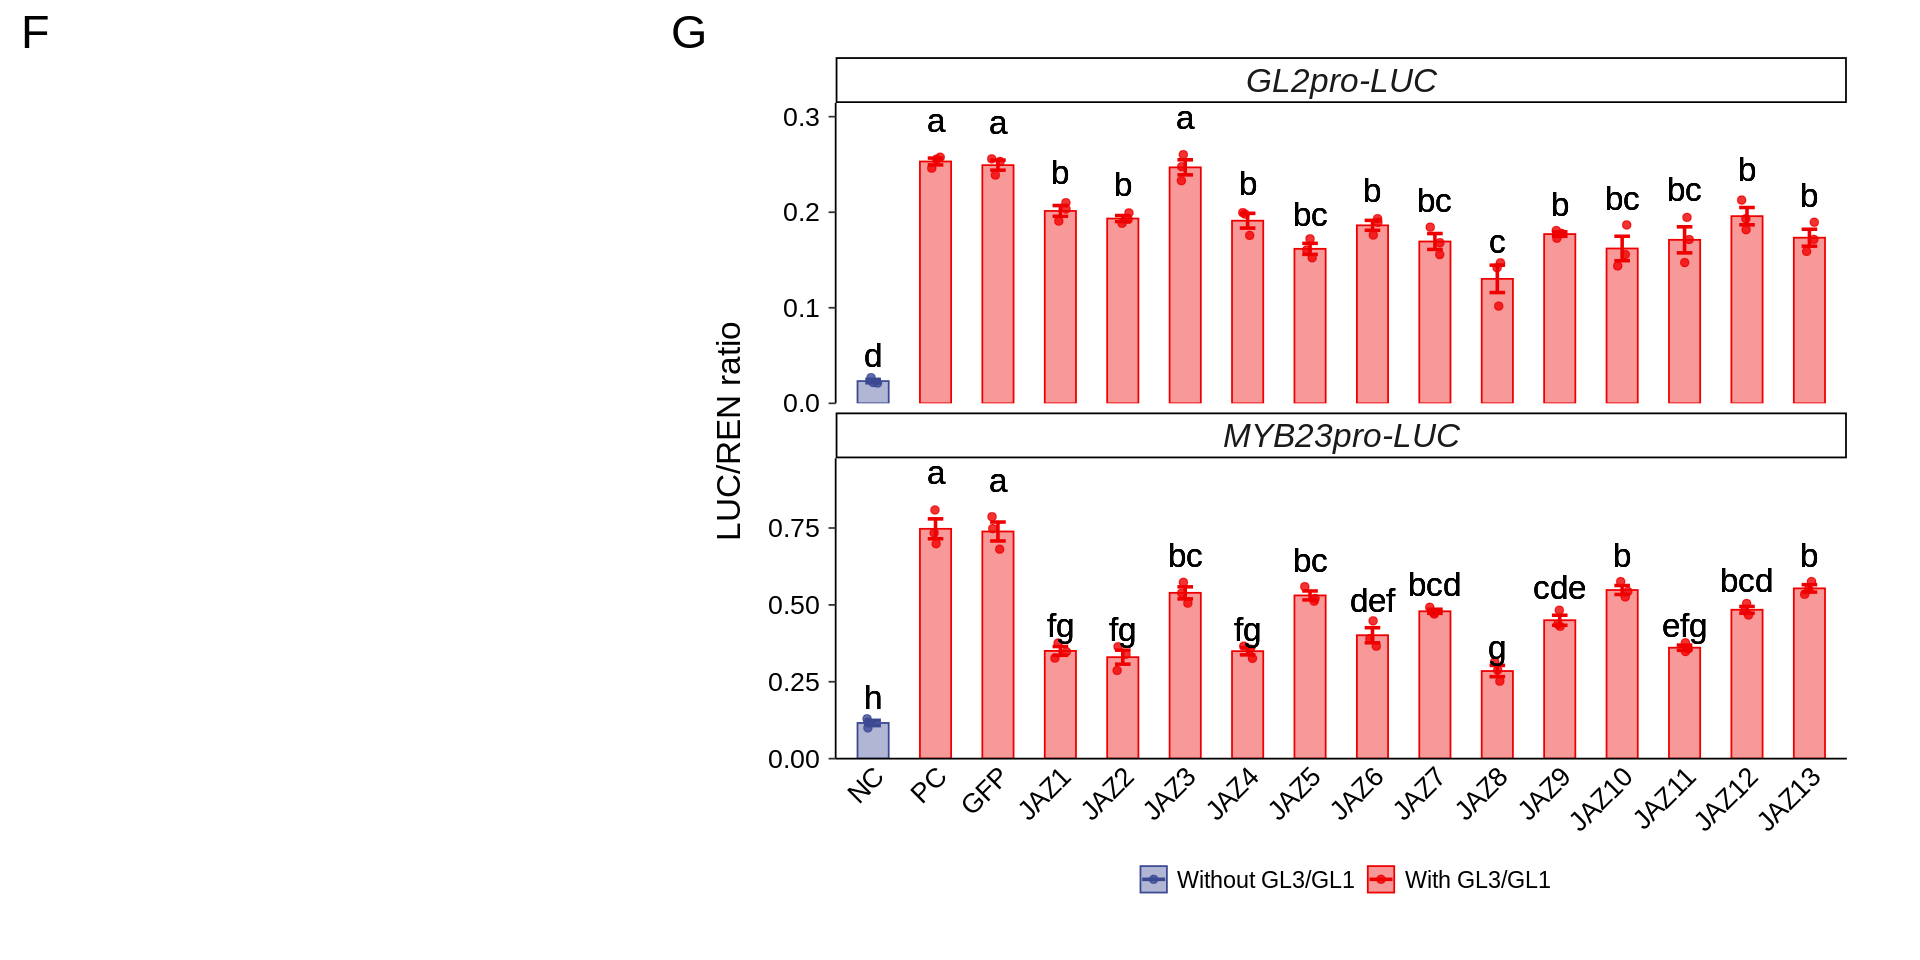

In [56]:
options(repr.plot.width = 16, repr.plot.height = 8)
fig1_p2 <- plot_grid(NULL,G1,
                      ncol=2,
                      rel_widths = c(1, 2),
                      labels = c('F','G'),
                      label_colour = 'black',
                      label_x = 0.01,
                      label_y = 1,
                      label_fontface = 1,
                      label_size = 28,
                    scale=0.9)
fig1_p2

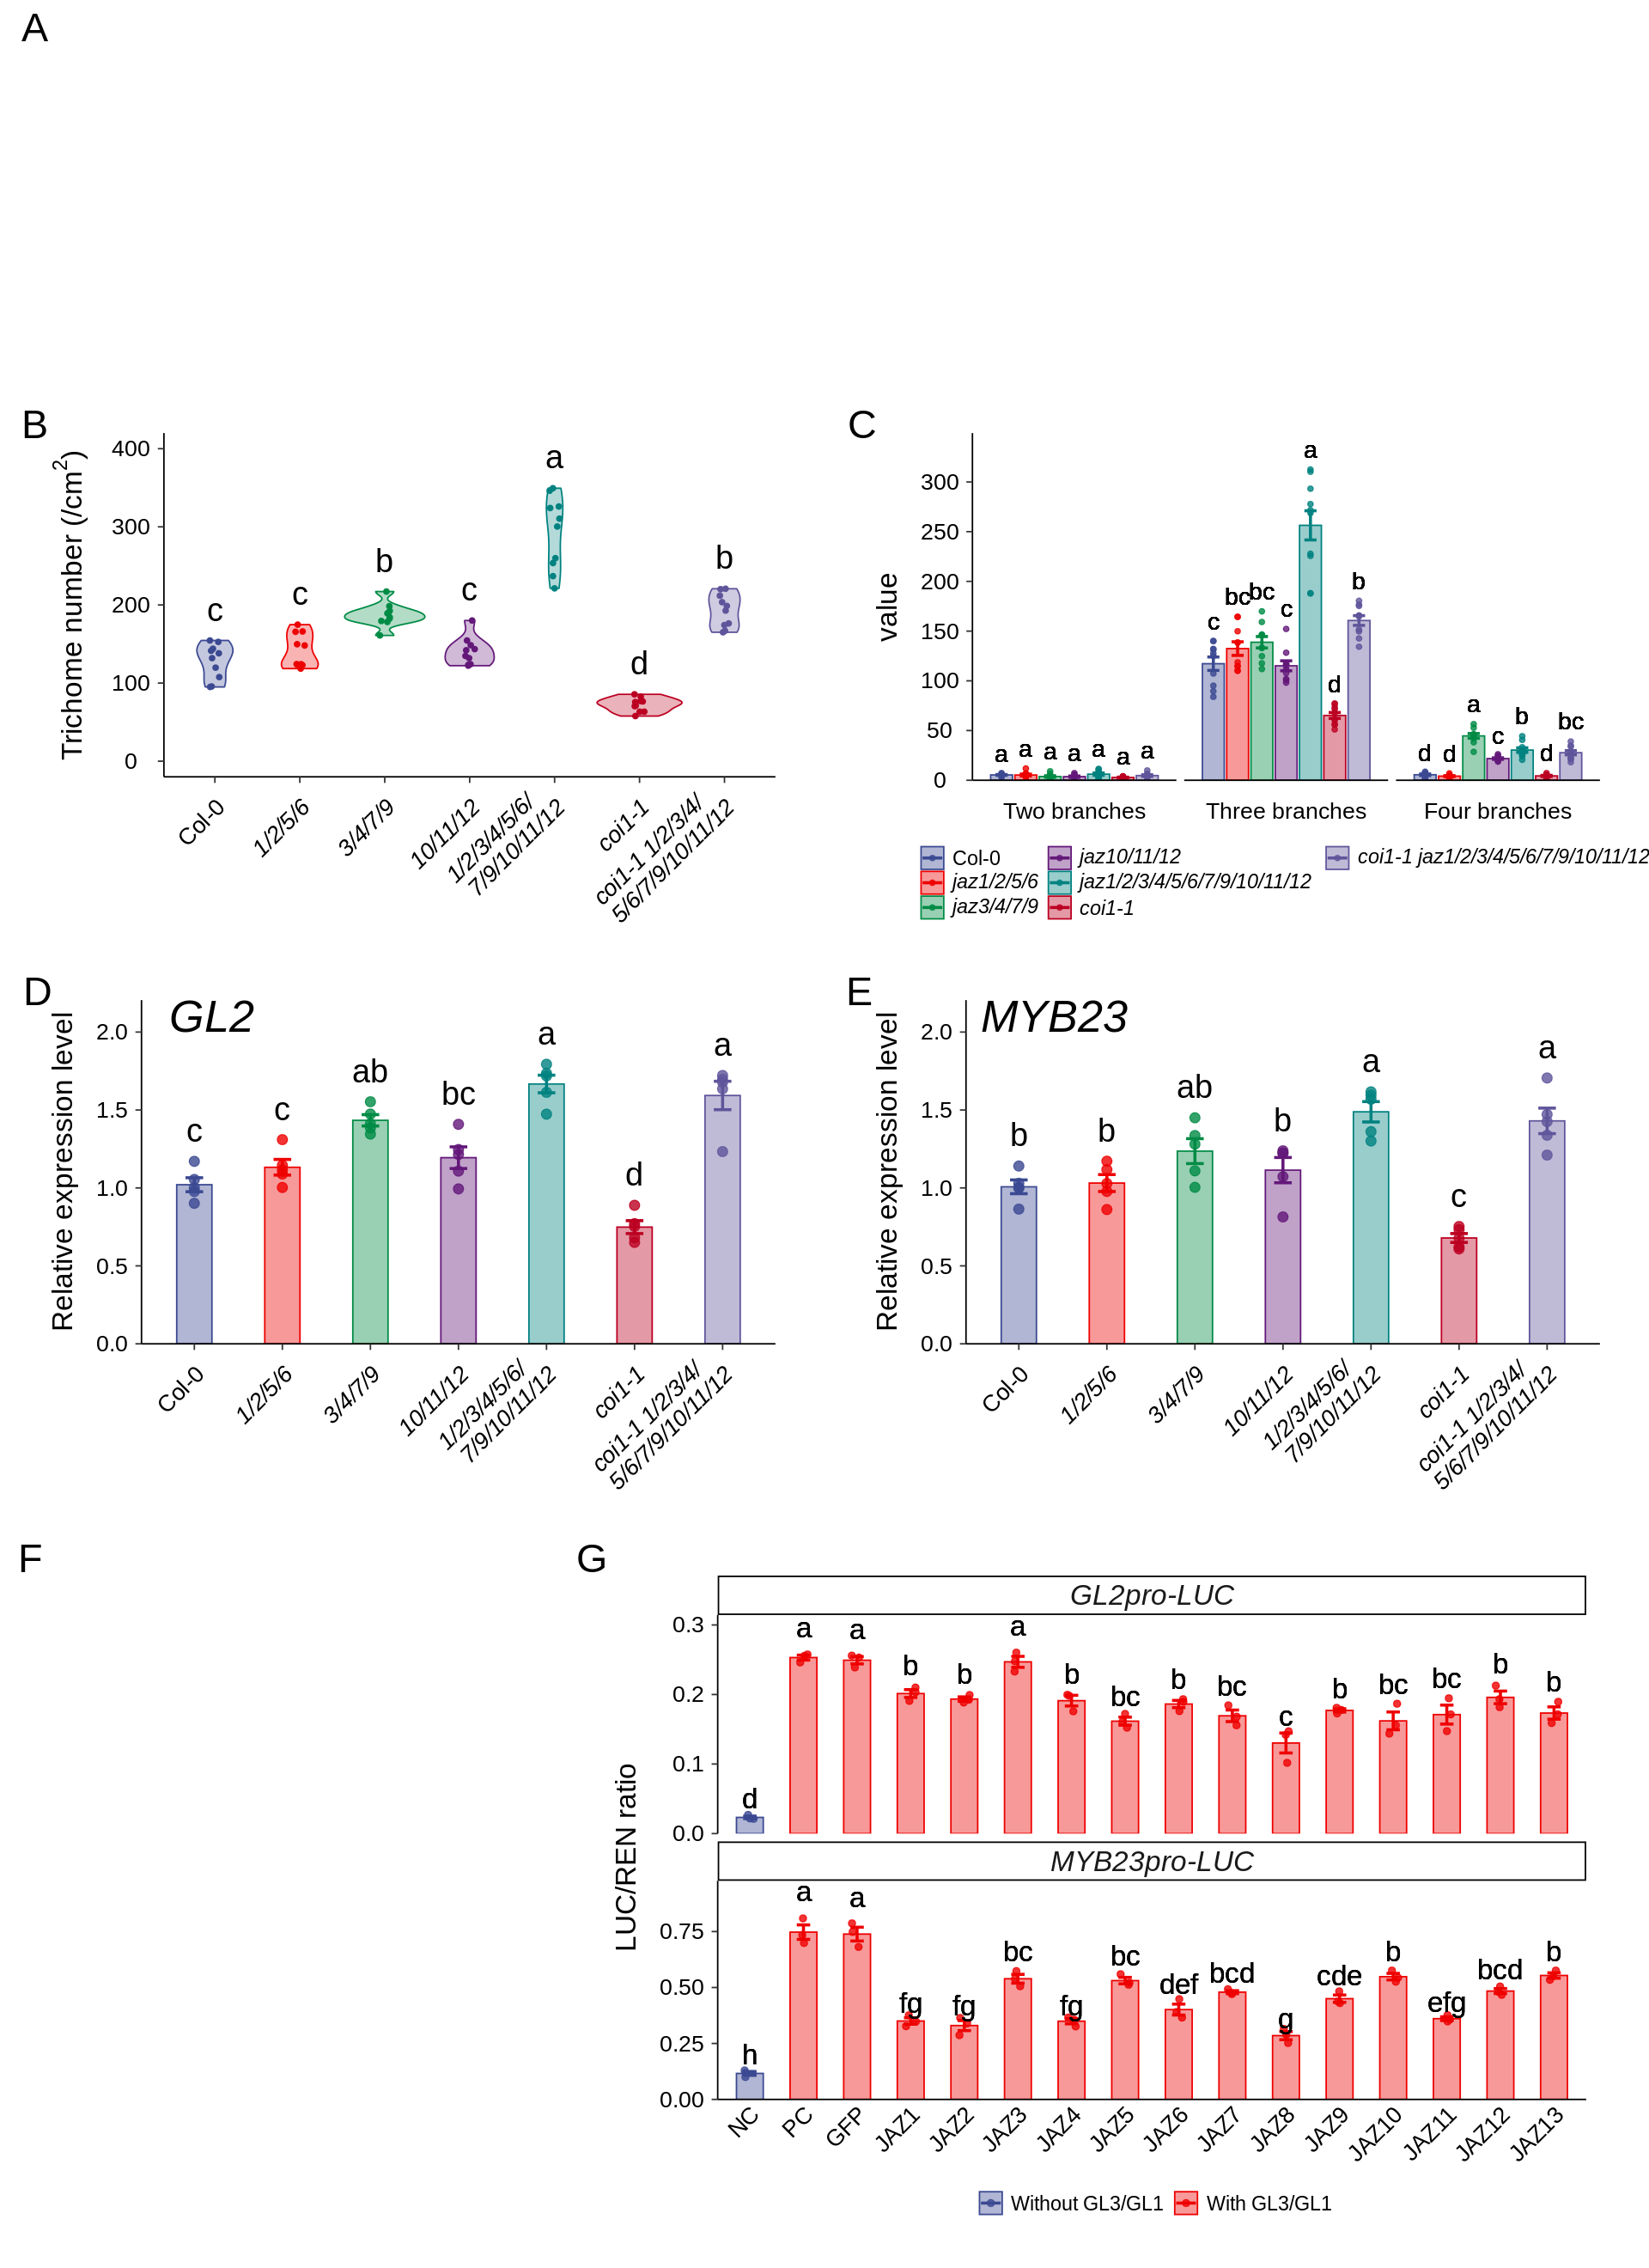

In [66]:
options(repr.plot.width = 16, repr.plot.height = 22)
fig1 <- plot_grid(fig1_p0, fig1_p1, fig1_p2,
          rel_heights = c(0.7,2,1.3),
          ncol=1)
fig1
ggsave2("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/02.V2_data/Figure1.v2.png",
      fig1, height=22, width=16, dpi=300)